### Домашнее задание «Модели ARMA»

Задание
1. Выберите ряд из первого задания.
2. Постройте его модель ARIMA.
3. Оформите отчёт в Jupyter-ноутбук.


Дополнительное задание*
Попробуйте спрогнозировать график классическим ML.

In [2]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.tsa.api as smt
from scipy.stats import boxcox

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.arima_model

from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
%matplotlib inline

from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

In [4]:
# возмем ежемесячные продажи компании x

series = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv").iloc[:,-1]
series.head()

0    154
1     96
2     73
3     49
4     36
Name: Count, dtype: int64

In [5]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (5, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))
        qq_ax = plt.subplot2grid(layout, (4, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        
        plt.tight_layout()
    return

In [6]:
# построим модель ARIMA, отобразим статистику теста на стационарность ряда и отобразим график временного ряда, модели и др

best_aic = np.inf 
best_order = None
best_mdl = None

for i in range(5):
    for d in range(5):
        for j in range(5):
            try:
                tmp_mdl = sm.tsa.arima.ARIMA(series, order=(i,d,j)).fit(method='mle', trend='nc')
                tmp_aic = tmp_mdl.aic
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (i, d, j)
                    best_mdl = tmp_mdl
            except: continue


print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))


aic:    inf | order: None


In [44]:
tmp_mdl = sm.tsa.arima.ARIMA(series, order=(1,1,1)).fit(method='mle', trend='n')
tmp_aic = tmp_mdl.aic

TypeError: ARIMA.fit() got an unexpected keyword argument 'trend'

In [26]:
tsplot(best_mdl.resid, lags=30)

AttributeError: 'NoneType' object has no attribute 'resid'

AttributeError: 'NoneType' object has no attribute 'plot_predict'

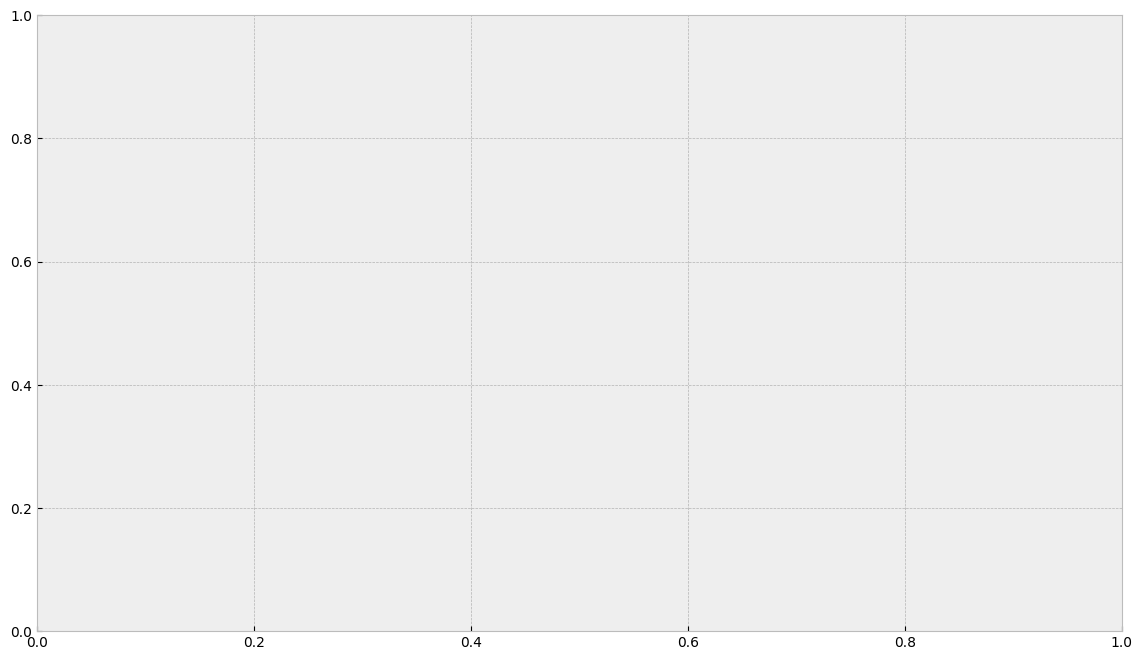

In [27]:
with plt.style.context('bmh'):
    plt.figure(figsize=(14,8))
    ax = plt.axes()
    best_mdl.plot_predict(2, len(series)+20, ax=ax)
    plt.plot(series, color='red', label='Series')
    plt.legend()
    plt.show()

ВЫВОД: